analyze the data to show how four treat
ments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
(MAYBE SOME RECODING, BINNING?
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer
 spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
...(operationalize as mouseid that contains all the timepoints)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
%ls

Instructions/        pydrug_sketch.ipynb
README.md            raw_data/


In [6]:
drugs = pd.read_csv('raw_data/mouse_drug_data.csv')
tumors = pd.read_csv('raw_data/clinicaltrial_data.csv')

In [7]:
tumors.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
drugs.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [9]:
tumors.shape

(1893, 4)

In [10]:
drugs.shape

(250, 2)

In [11]:
pd.merge?

In [13]:
data = pd.merge(drugs, tumors, how='outer')

In [14]:
data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [25]:
data = data.rename(columns={'Mouse ID': 'mouse_id', 'Tumor Volume (mm3)': 'tumor_vol','Metastatic Sites': 'mets'})

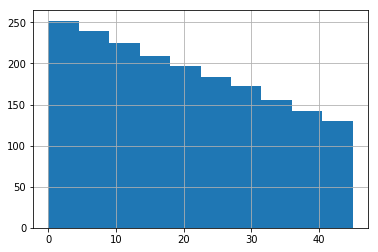

In [17]:
data.Timepoint.hist()

**there are TEN timepoints**

In [63]:
data.Timepoint.value_counts()
#ten time points

0     252
5     240
10    225
15    209
20    197
25    184
30    172
35    155
40    142
45    130
Name: Timepoint, dtype: int64

In [26]:
data['mouse_id'].nunique()

249

In [27]:
data['mouse_id'].count()

1906

In [29]:
data.groupby('mouse_id')['mets'].mean()

mouse_id
a203    1.100000
a251    0.800000
a262    2.300000
a275    1.200000
a366    0.142857
a401    2.100000
a411    0.800000
a444    0.000000
a457    0.000000
a492    0.500000
a520    0.500000
a577    1.428571
a644    0.100000
a685    0.700000
a699    0.300000
a788    0.714286
a818    0.300000
a897    2.400000
a963    0.400000
b128    0.700000
b313    0.666667
b447    0.000000
b487    0.166667
b559    0.600000
b742    0.000000
b759    0.142857
b879    1.400000
c139    0.600000
c264    1.200000
c282    0.700000
          ...   
w697    2.125000
w746    0.000000
w914    0.500000
x111    0.666667
x209    0.000000
x226    0.000000
x264    1.777778
x336    0.000000
x401    0.000000
x402    1.900000
x581    2.100000
x613    0.000000
x773    2.800000
x822    1.600000
x930    0.000000
y163    1.300000
y260    2.600000
y449    0.000000
y478    0.900000
y601    0.500000
y769    2.300000
y793    1.400000
y865    1.800000
z234    0.500000
z314    0.000000
z435    0.000000
z578    0.000000
z581 

### METS

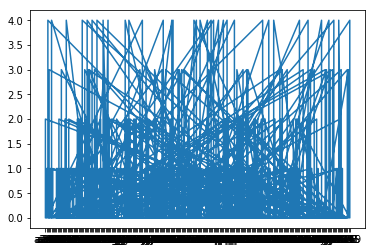

In [33]:
plt.plot(data.mouse_id, data.mets, label='mets')

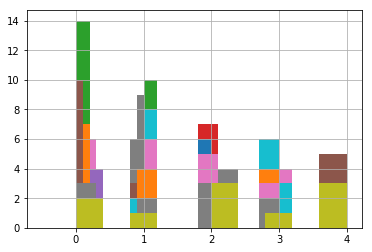

In [39]:
data.groupby('mouse_id')['mets'].hist(bins=10);

### TUMORVOLUME

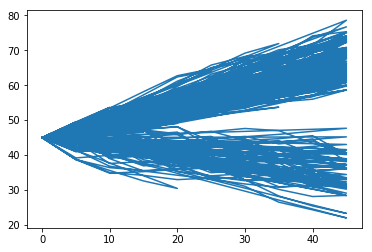

In [40]:
plt.plot(data.Timepoint, data.tumor_vol, label='tumorvol')
#for each treatment

In [42]:
data.Drug.value_counts()
#Capomulin, Infubinol, Ketapril, and Placebo

Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug, dtype: int64

In [44]:
capomulin = data[data.Drug == "Capomulin"]
infubinol = data[data.Drug == "Infubinol"]
ketapril = data[data.Drug == "Ketapril"]
placebo = data[data.Drug == "Placebo"]

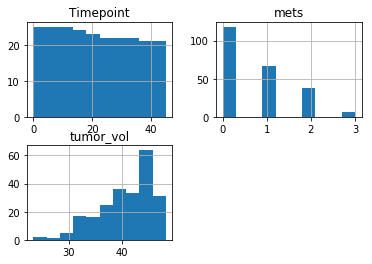

In [65]:
capomulin.hist();
#could do some sns.FacetGrid stuff

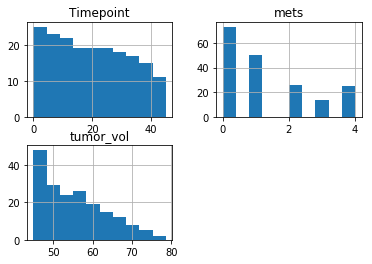

In [51]:
ketapril.hist();

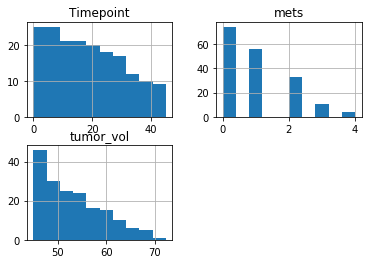

In [50]:
infubinol.hist();

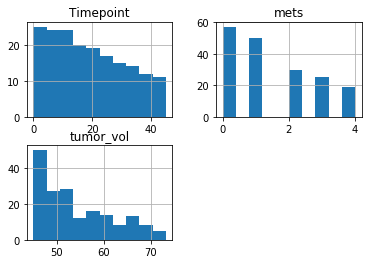

In [55]:
placebo.hist();

In [ ]:
# Create a scatter plot which compares MPG to horsepower
# car_data.plot(kind="scatter", x="horsepower", y="mpg", grid=True, figsize=(20,10),
#               title="Horsepower Vs. MPG", s=car_data.cylinders * 10)
# plt.show()

ValueError: x and y must be the same size

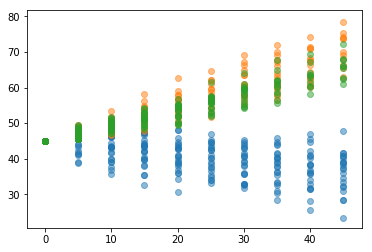

In [59]:
plt.scatter(capomulin.Timepoint, capomulin.tumor_vol, label='cap', alpha=0.5)
plt.scatter(ketapril.Timepoint, ketapril.tumor_vol, label='ket', alpha=0.5)
plt.scatter(infubinol.Timepoint, infubinol.tumor_vol, label='inf', alpha=0.5)
plt.scatter(placebo.Timepoint, infubinol.tumor_vol, label='placebo', alpha=0.5)
plt.legend(loc='best', title='tumor volume by treatment over time', fancybox=True)

ValueError: x and y must be the same size

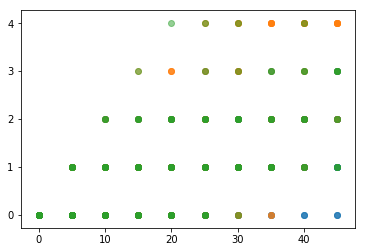

In [60]:
plt.scatter(capomulin.Timepoint, capomulin.mets, label='cap', alpha=0.5)
plt.scatter(ketapril.Timepoint, ketapril.mets, label='ket', alpha=0.5)
plt.scatter(infubinol.Timepoint, infubinol.mets, label='inf', alpha=0.5)
plt.scatter(placebo.Timepoint, infubinol.mets, label='placebo', alpha=0.5)
plt.legend(loc='best', title='tumor volume by treatment over time', fancybox=True)

In [61]:
data.groupby('mouse_id')['mets'].count()
#so the ones where count == 10 survived? 
#make this a mask

mouse_id
a203    10
a251    10
a262    10
a275    10
a366     7
a401    10
a411    10
a444    10
a457     3
a492    10
a520    10
a577     7
a644    10
a685    10
a699    10
a788     7
a818    10
a897    10
a963    10
b128    10
b313     6
b447     1
b487     6
b559    10
b742    10
b759     7
b879    10
c139    10
c264    10
c282    10
        ..
w697     8
w746     2
w914    10
x111     3
x209     3
x226     1
x264     9
x336     1
x401    10
x402    10
x581    10
x613     4
x773    10
x822    10
x930     6
y163    10
y260    10
y449     4
y478    10
y601     2
y769    10
y793    10
y865    10
z234     2
z314     2
z435     3
z578    10
z581    10
z795    10
z969    10
Name: mets, Length: 249, dtype: int64

### bar graph - total % tumor volume change for each drug across the full 45 days.
x = time 
color = drug
y = tumor volume change (so there is a calculation to be done on df before plotting)

In [ ]:
tumor_vol_change = data.groupby['Drug']('tumor_vol').count()
# gender_chart = gender_trips.plot(kind="bar", title="Bike Trips by Gender")
# gender_chart.set_xlabel("Time")
# gender_chart.set_ylabel("Tumor Volume")